In [17]:
from anytree import Node, RenderTree
from collections import defaultdict
import sys
import os
import igraph as ig
import numpy as np
import pretty_midi
import matplotlib.pyplot as plt
import glob
import music21
import libfmp.c1
import libfmp.b
import pandas as pd

In [18]:
#NOTE: BASIC TREE REPRESENTATION
# udo = Node("Udo")
# marc = Node("Marc", parent=udo)
# lian = Node("Lian", parent=marc)
# dan = Node("Dan", parent=udo)
# jet = Node("Jet", parent=dan)
# jan = Node("Jan", parent=dan)
# joe = Node("Joe", parent=dan)

# print(udo)
# print(joe)

# for pre, fill, node in RenderTree(udo):
#     print("%s%s" % (pre, node.name))

# print(dan.children)



# def rec_dd():
#     """"recursive default dict"""
#     return defaultdict(rec_dd)

# tree = rec_dd()
# for dirs in os.listdir(path):
#     for files in dirs:
#         print(files)
#         if not files.endswith('.csv'):
#             cur_tree = tree['.']
#         else:
#             cur_tree = tree
#         for key in files.split('\\'):
#             cur_tree = cur_tree[key]

#         for d in dirs:
#             cur_tree[d] = rec_dd()
            
# print(cur_tree)

In [19]:
path_score_BPS = './Midi_files/BPS'
file_list_BPS = glob.glob(path_score_BPS + '/*.mid')
path_score_ABC = './Midi_files/ABC'
file_list_ABC = glob.glob(path_score_ABC + '/*.mid')

# Symbolic Graph Representation

The next function produces a simple graph representation

C:\Users\HP\AppData\Local\Temp/ipykernel_12024/2921755799.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


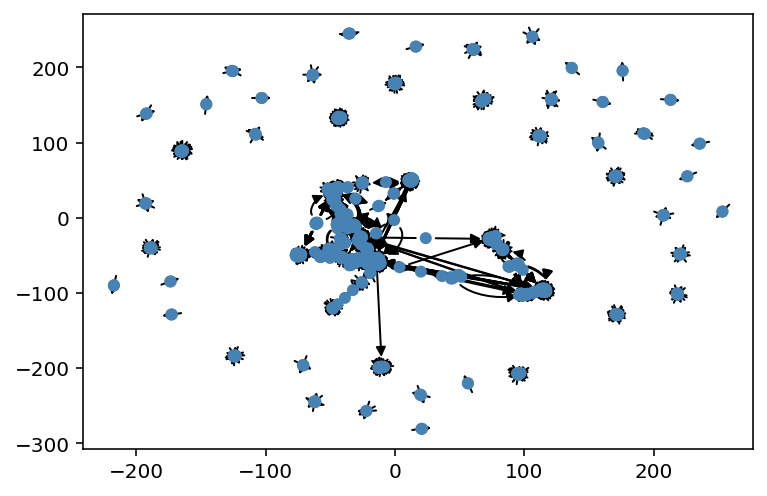

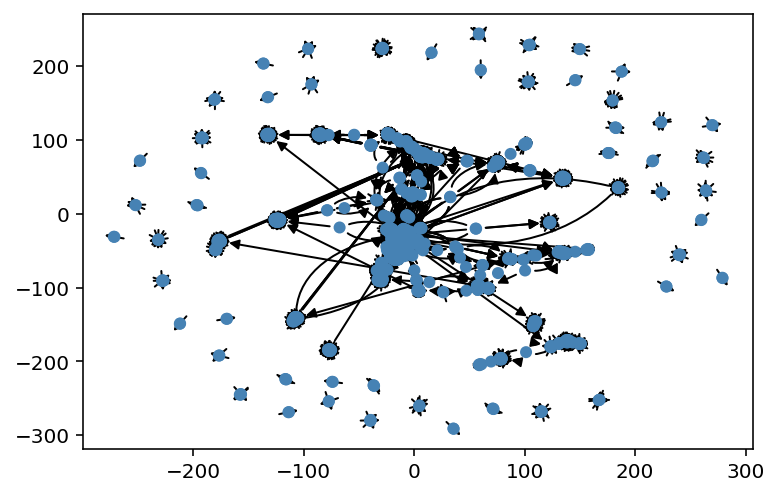

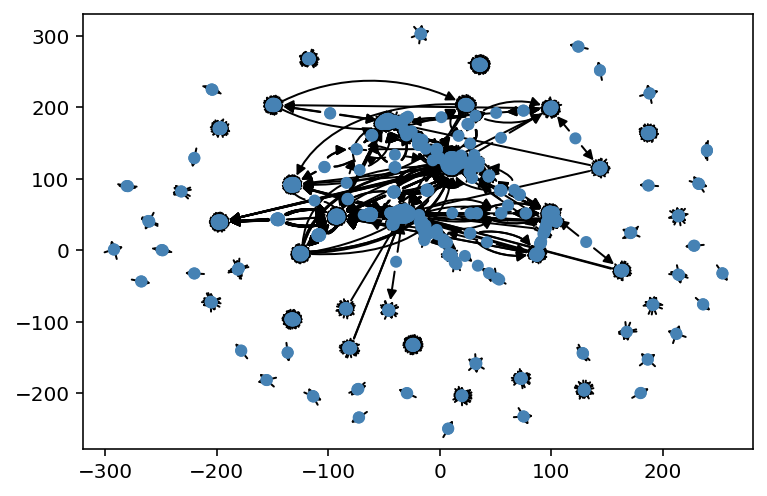

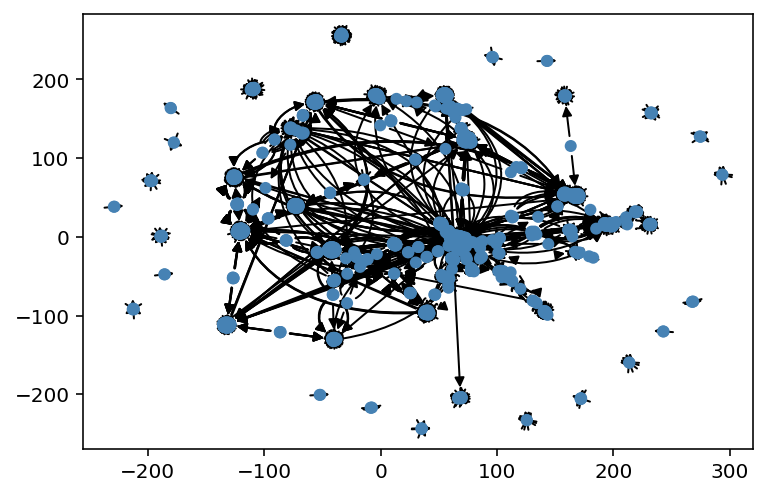

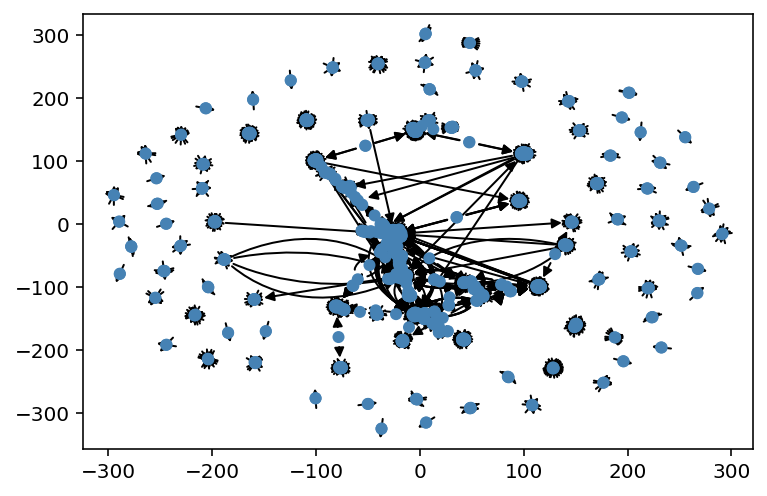

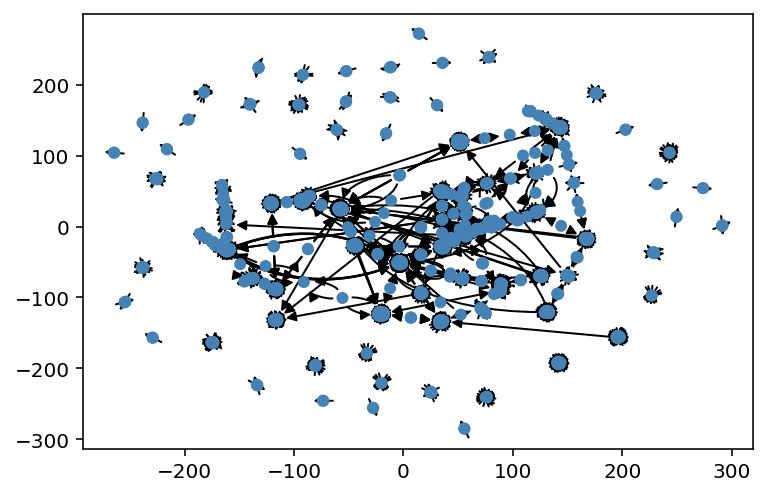

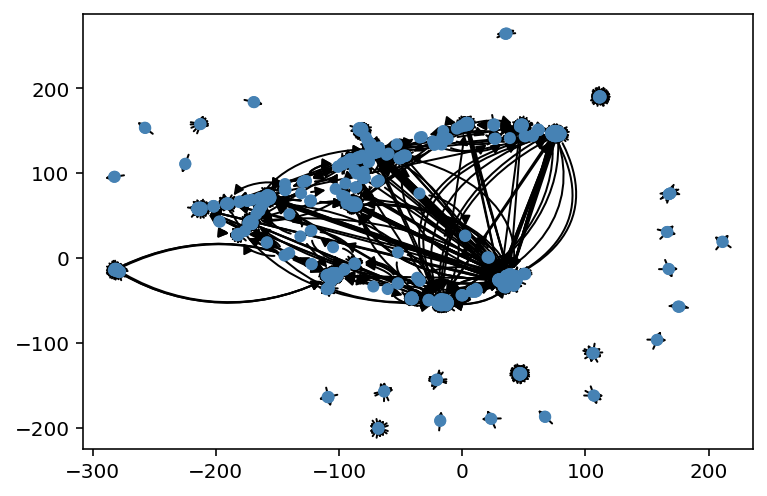

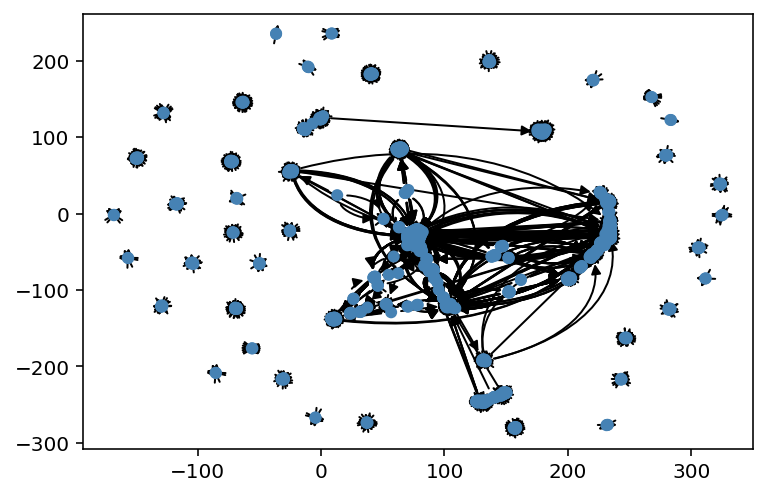

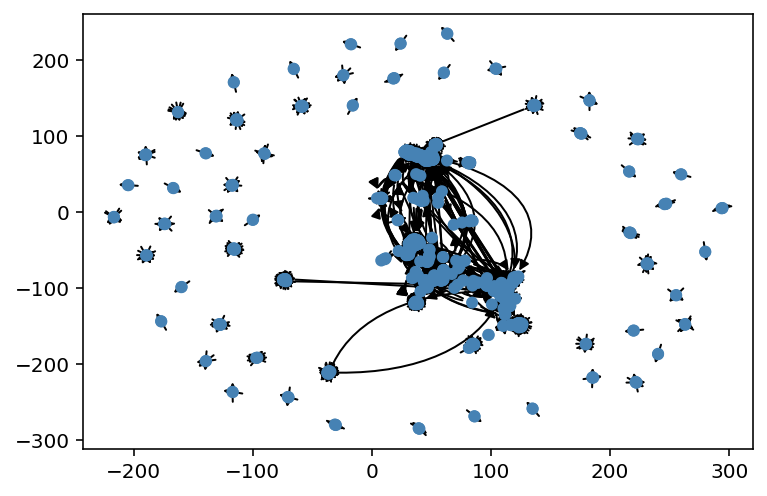

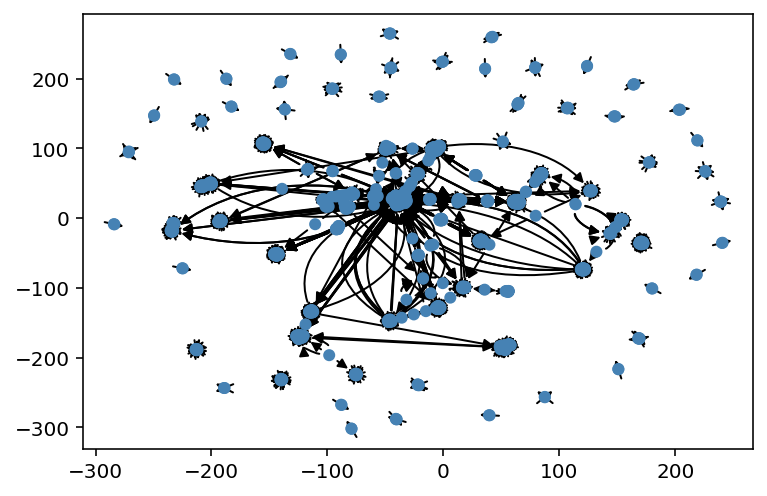

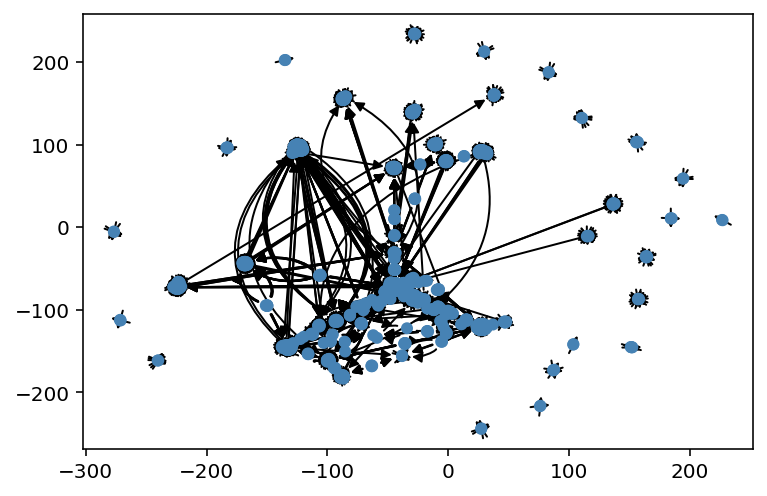

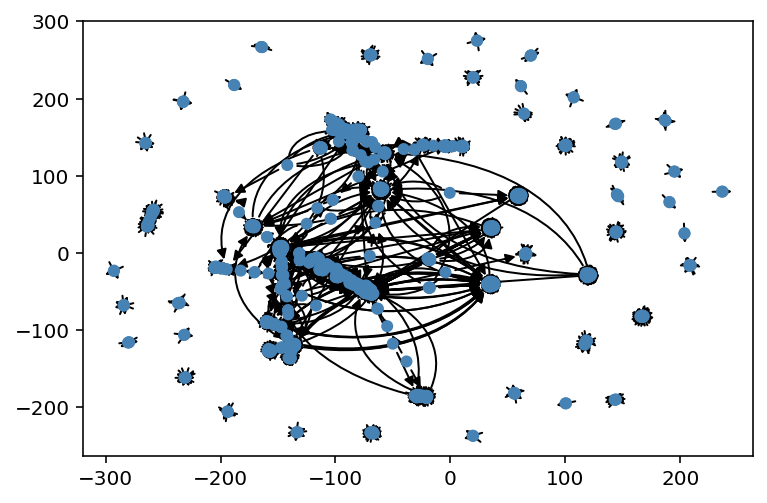

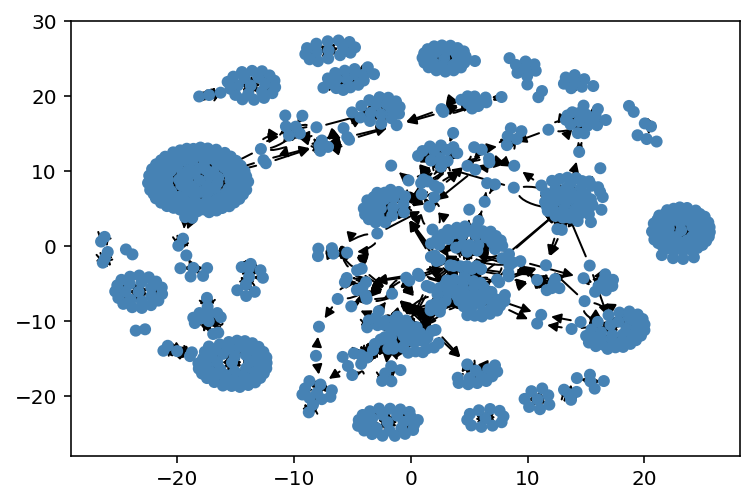

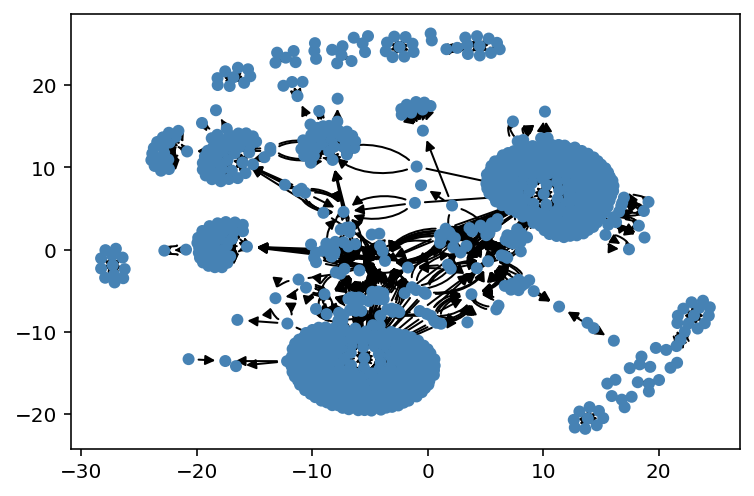

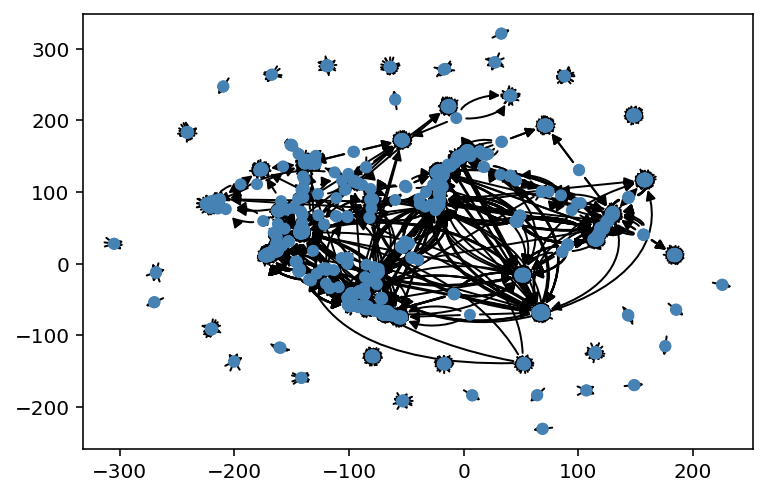

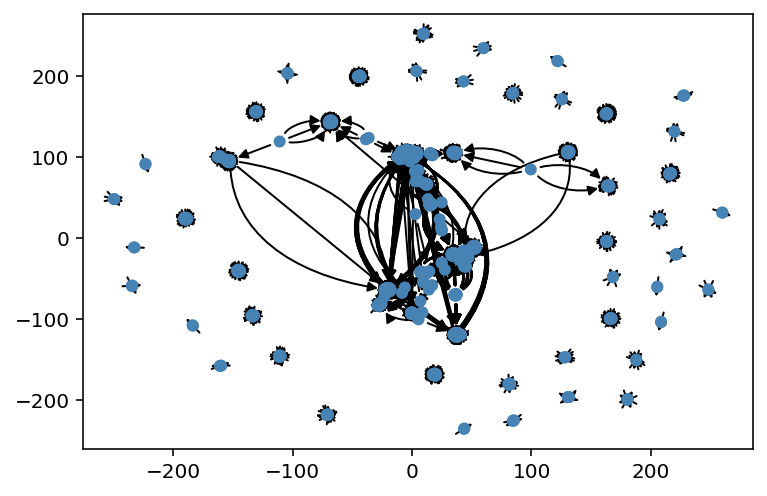

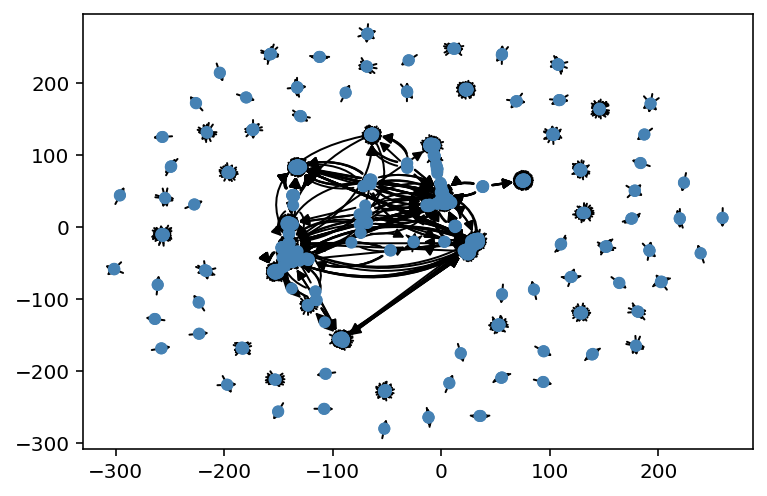

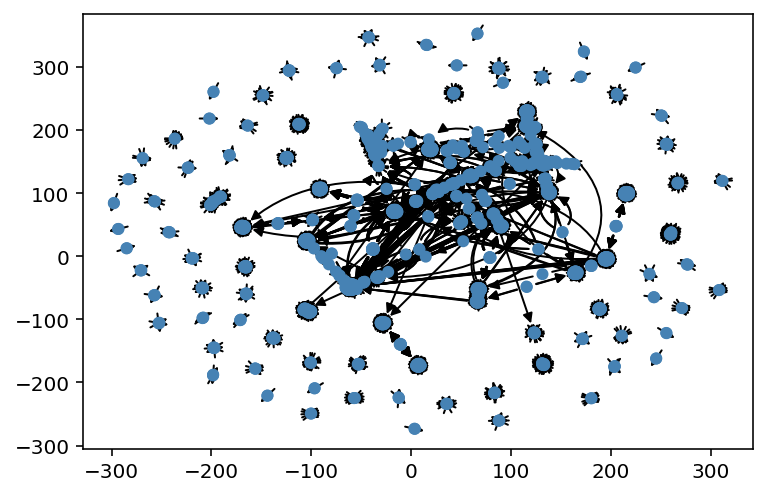

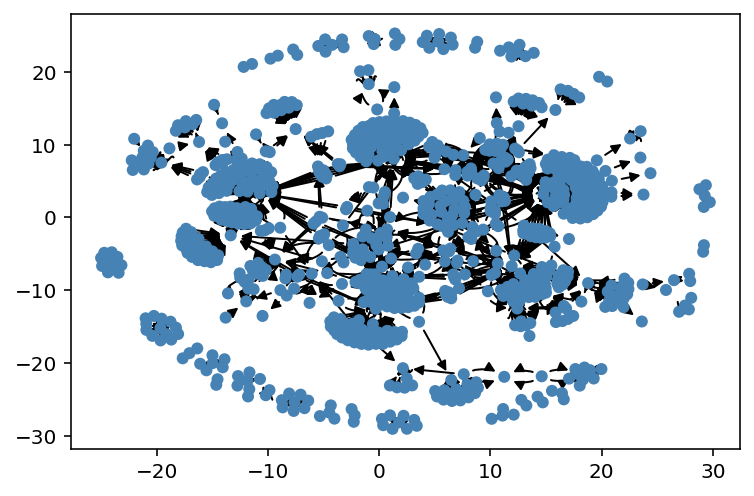

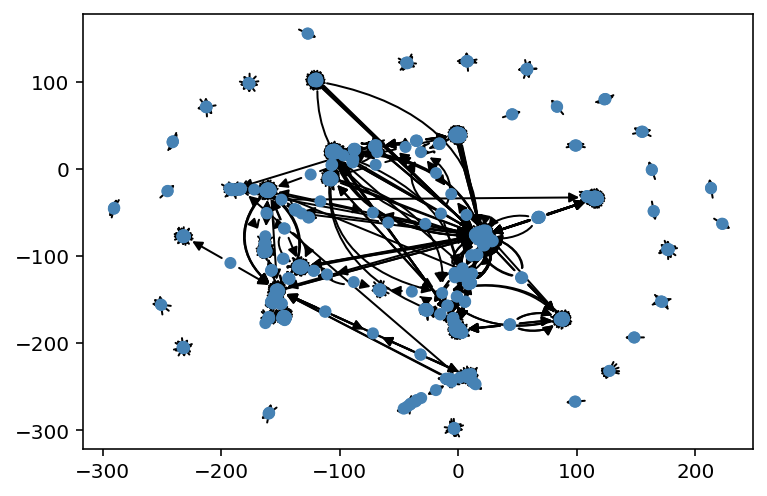

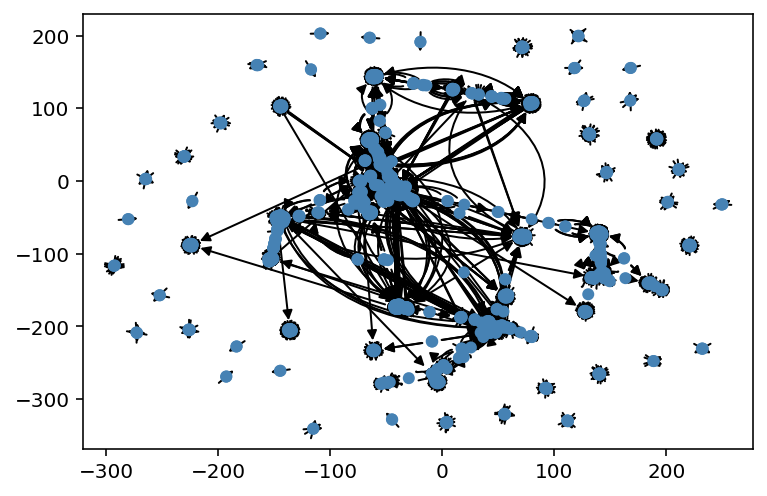

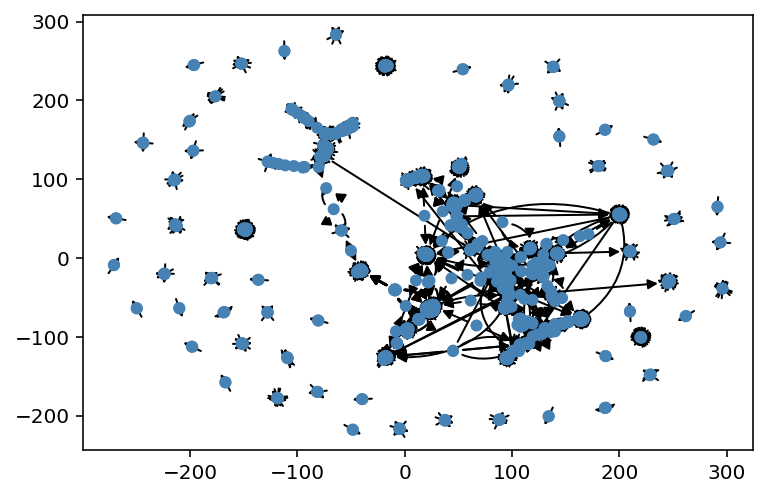

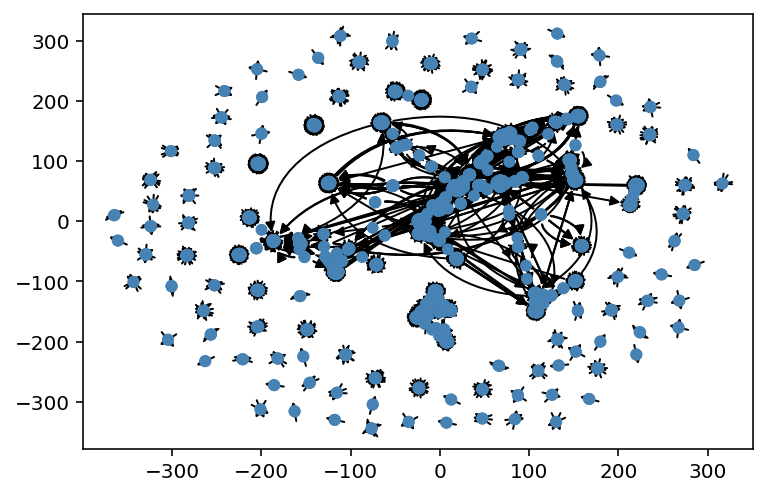

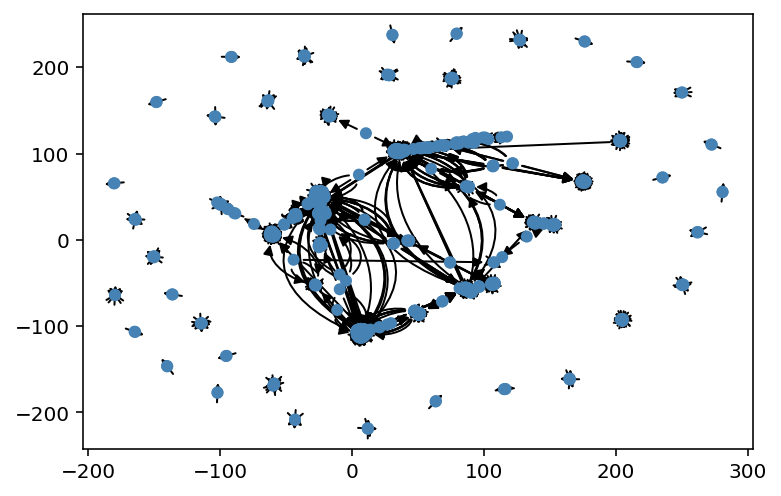

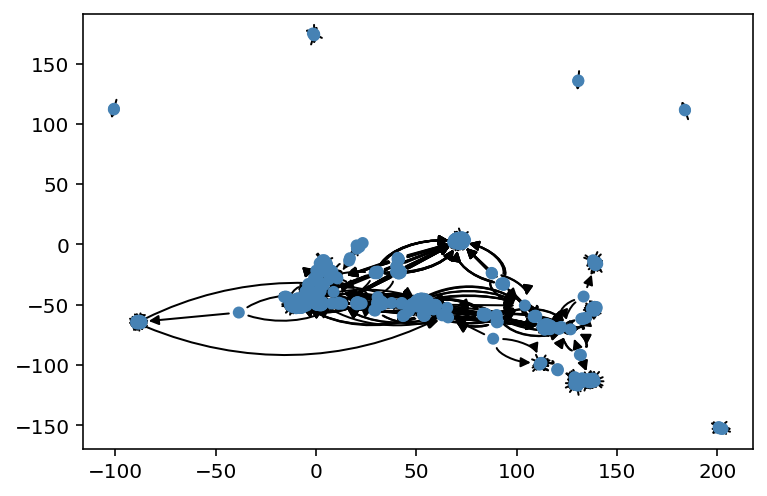

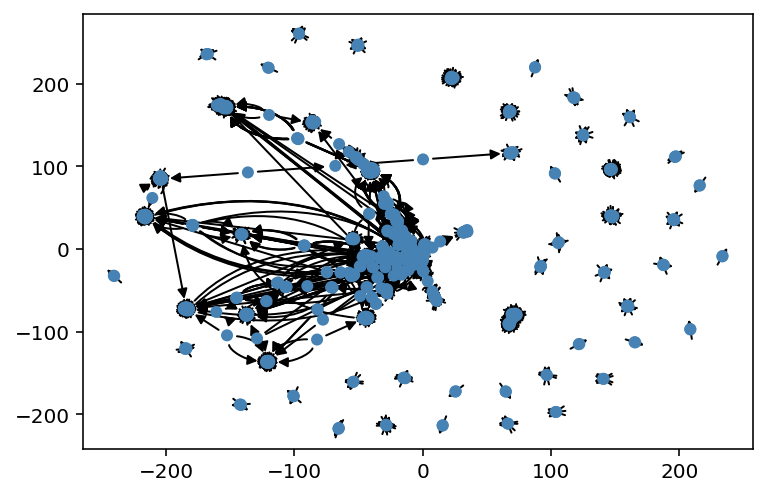

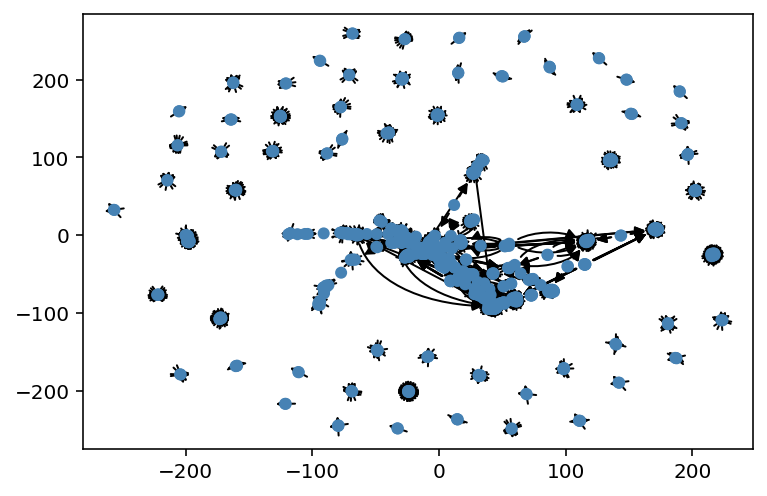

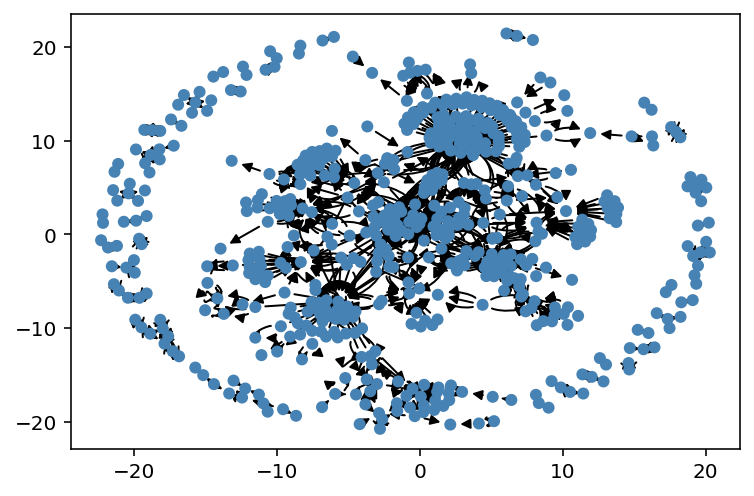

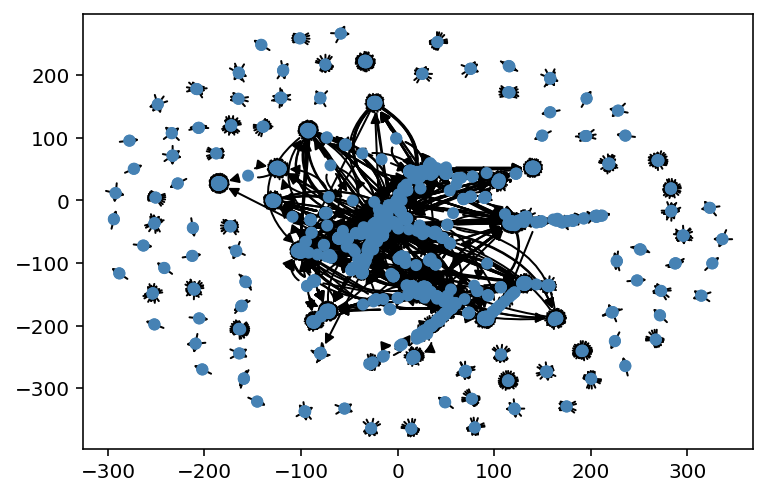

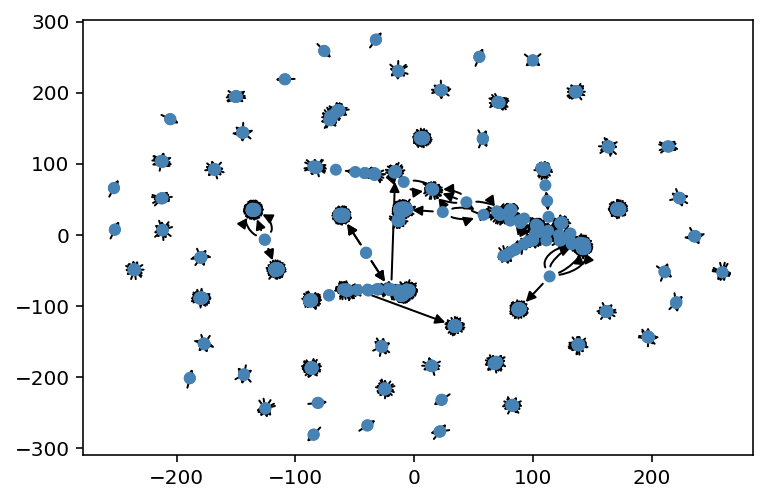

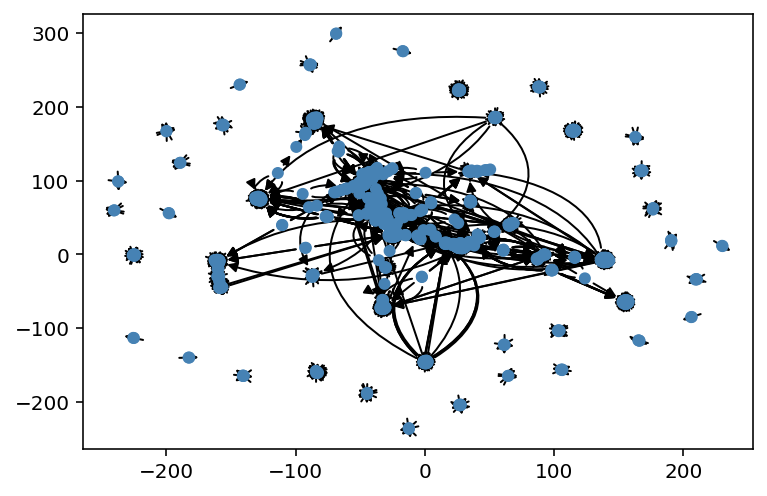

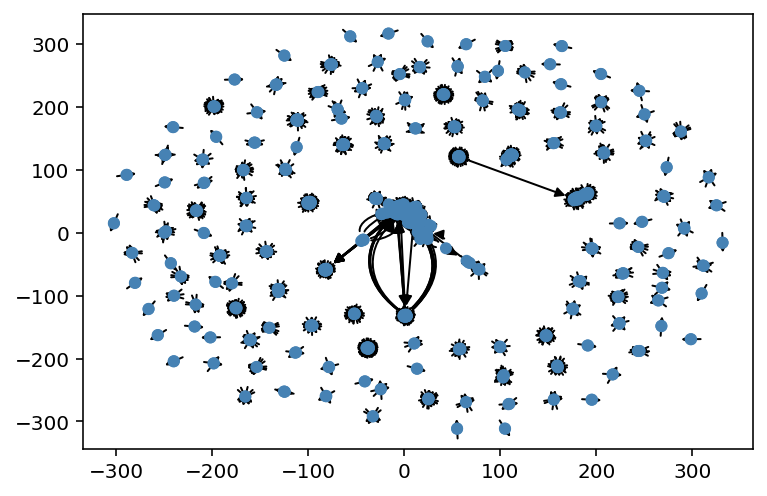

In [20]:
def symbolic_graph_chord(file):
        #df = pd.read_excel(file, index_col=0)
        #df1 = pd.DataFrame(df, columns=['Onset', 'Offset', 'Key', 'Degree', 'Quality', 'Inversion', 'Roman Numeral Notation (RNN)'])
        #df1.drop(['Onset', 'Offset','Degree' , 'Inversion'], axis=1)
        #df.to_csv(index=False)
        #cols = df.columns.tolist()
        
        midi_data = pretty_midi.PrettyMIDI(file)
        score = libfmp.c1.midi_to_list(midi_data)
        df = pd.DataFrame(score, columns=['Start', 'Duration', 'Pitch', 'Velocity', 'Instrument'])
        df.drop(['Start', 'Duration', 'Velocity', 'Instrument'], axis=1)
        g = ig.Graph.TupleList(df.itertuples(index=False), directed=True, weights=False, edge_attrs="weight")
        fig, ax = plt.subplots()
        ig.plot(g, target=ax)
        #for i in range(0, len(df0)):
        #    chord = Node(no)
        #    chord_vector.append(chord)
        #return chord_vector
        return g
    
for file in file_list_BPS:
    symbolic_graph_chord(file)

In [21]:
#!pip install git+https://github.com/vishnubob/python-midi@feature/python3

C:\Users\HP\AppData\Local\Temp/ipykernel_12024/3025879606.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


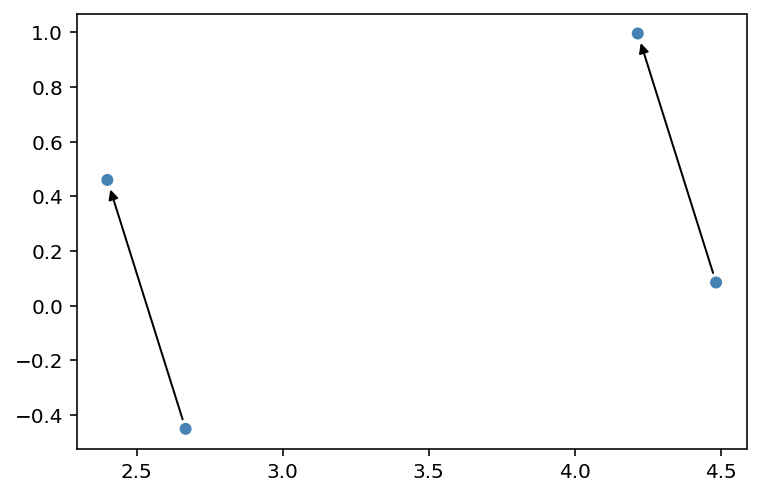

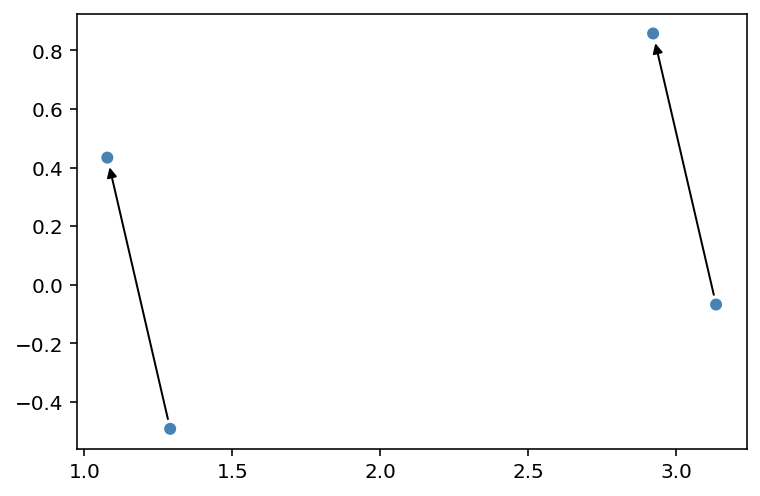

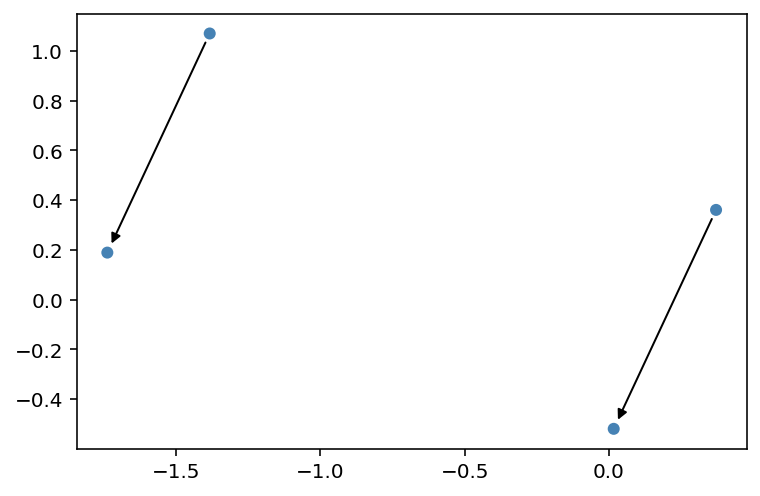

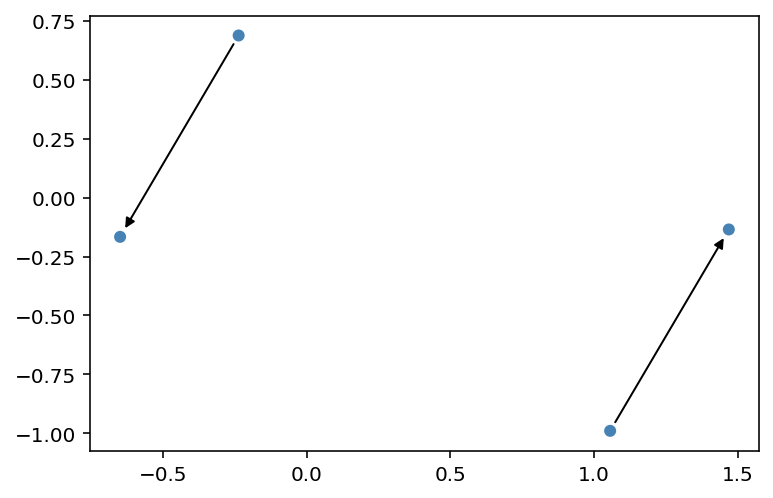

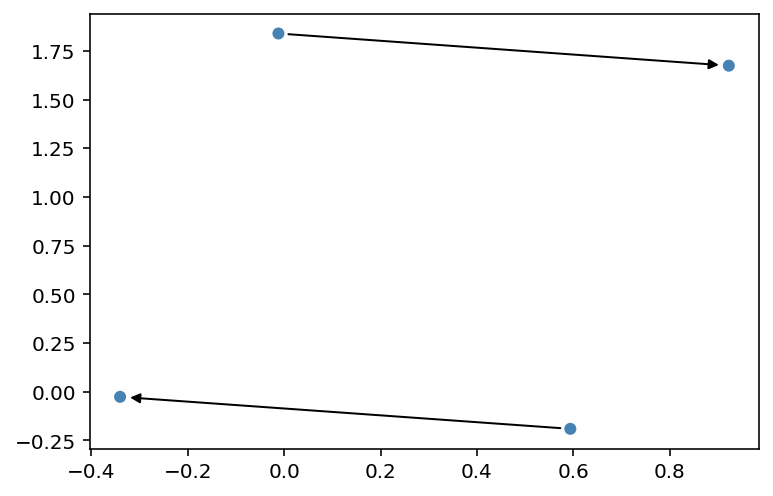

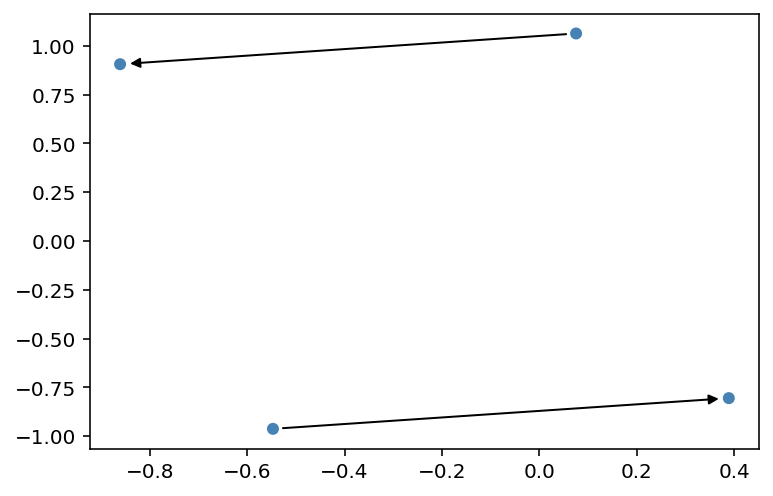

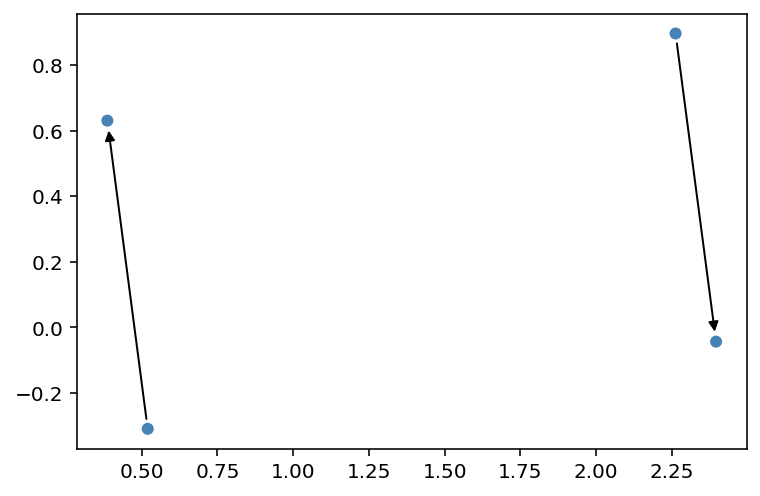

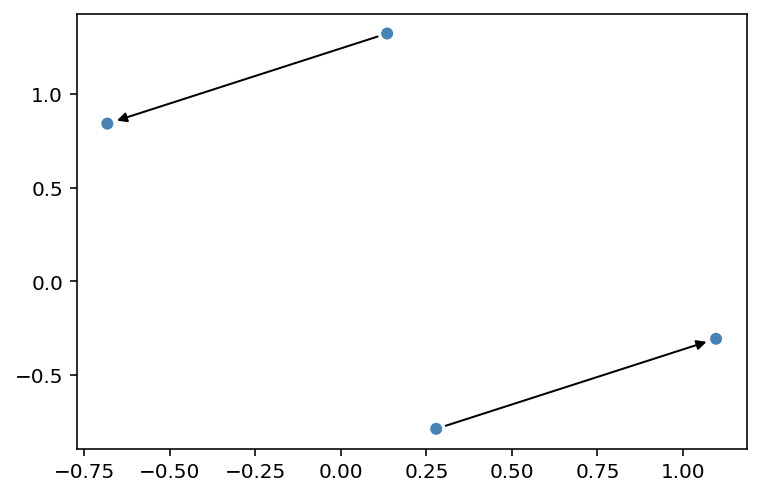

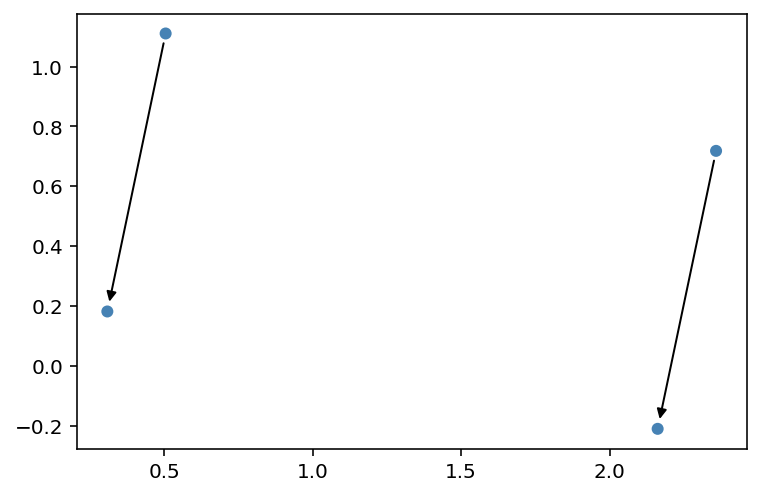

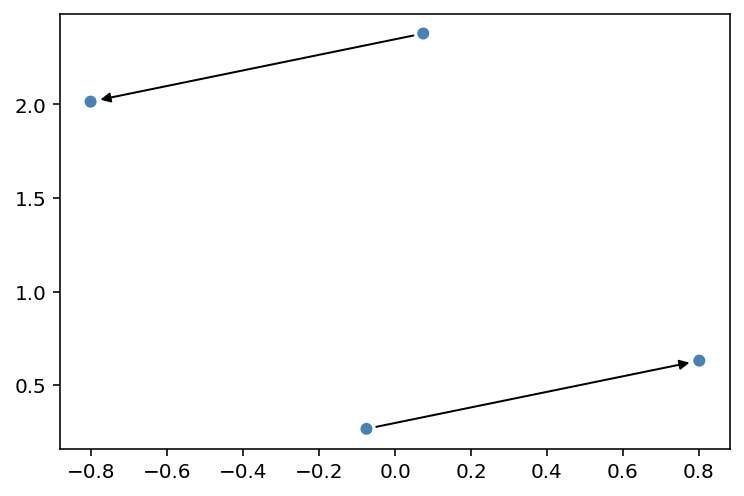

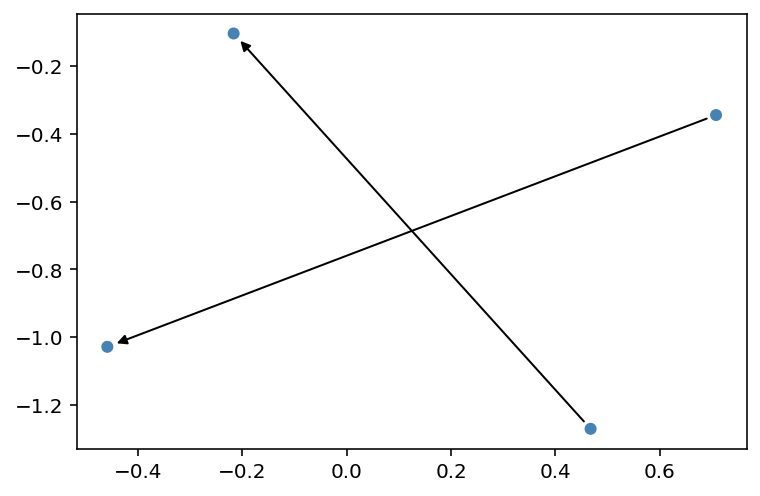

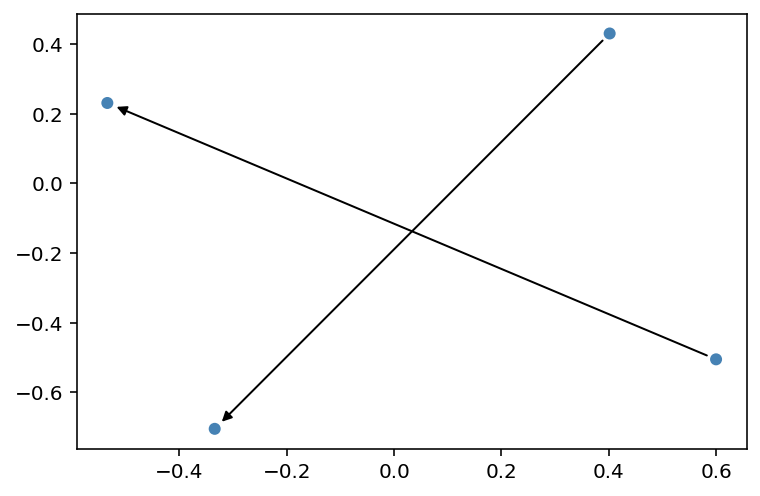

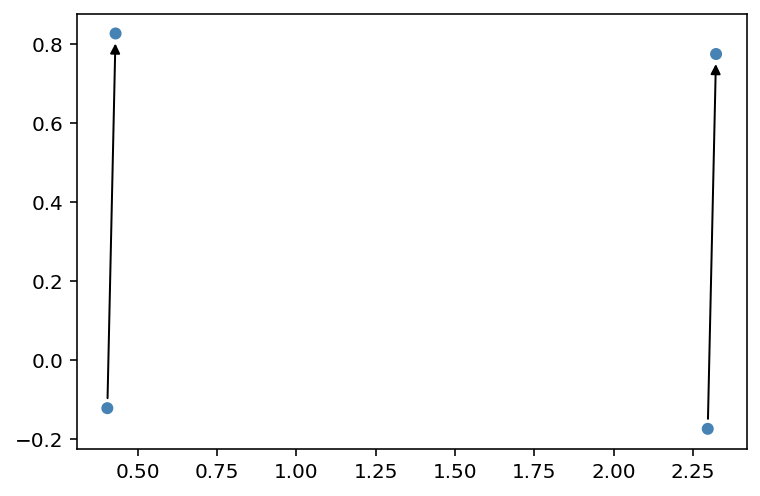

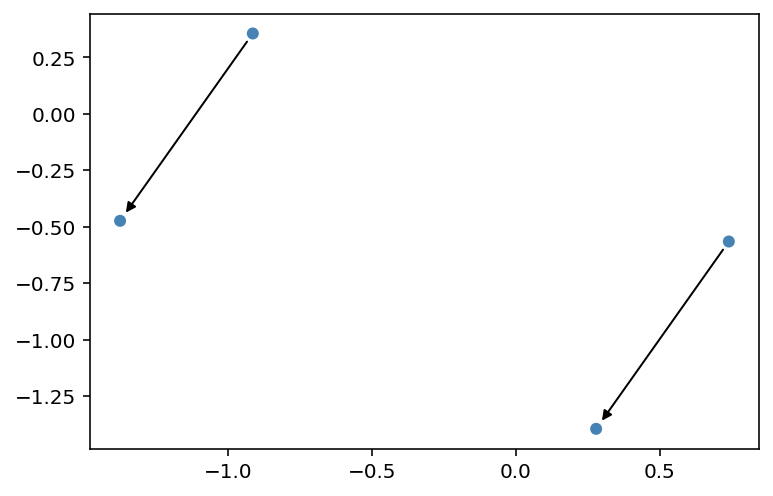

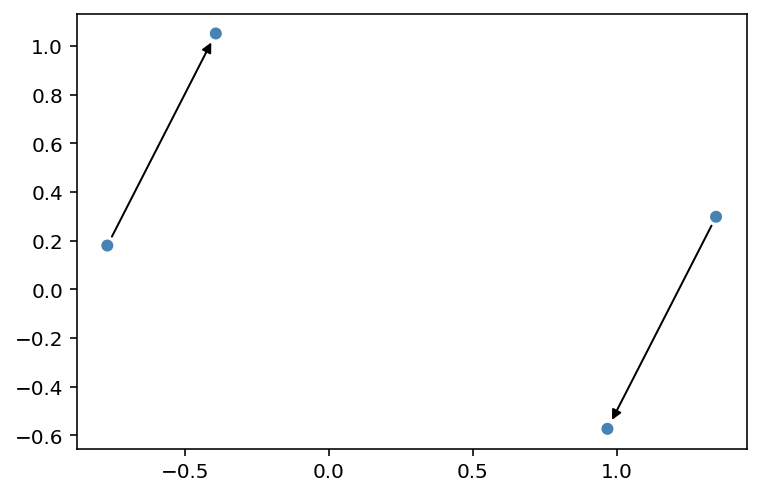

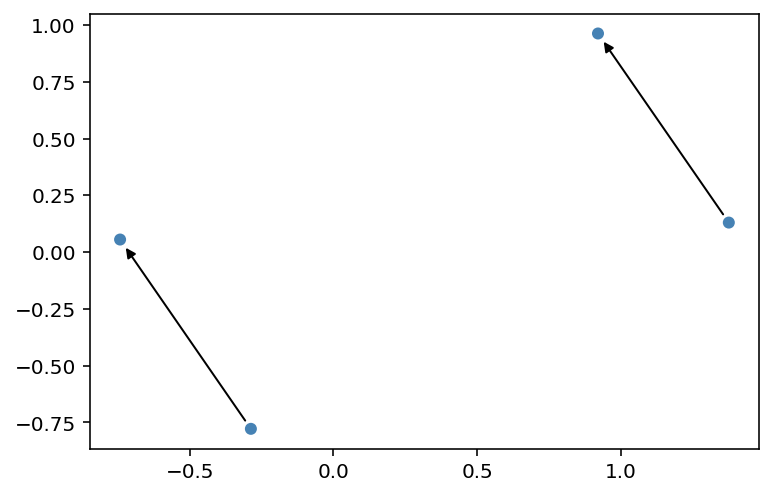

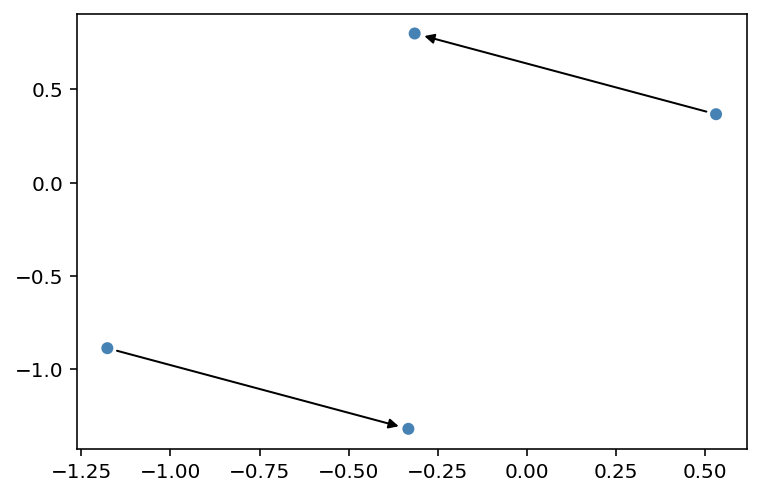

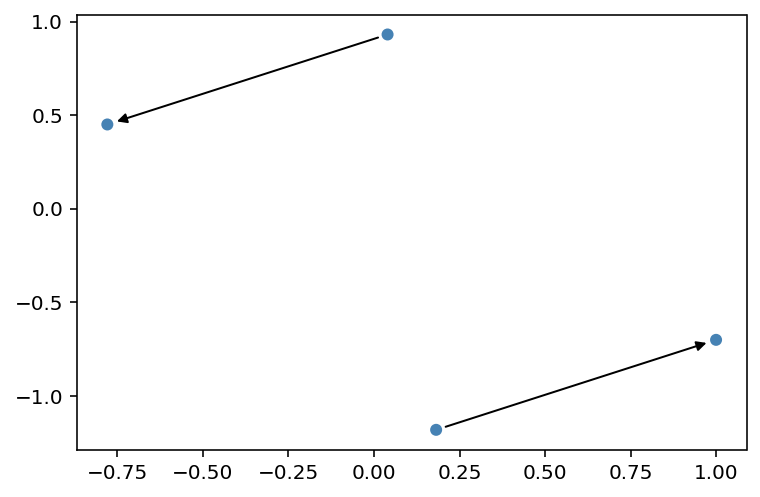

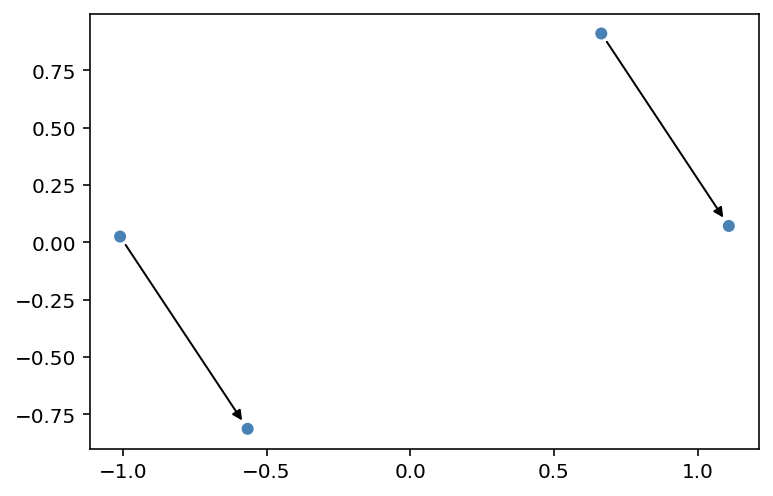

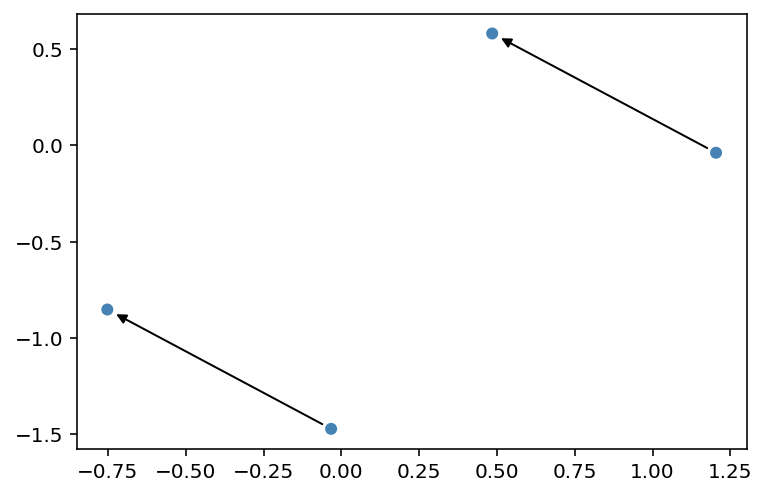

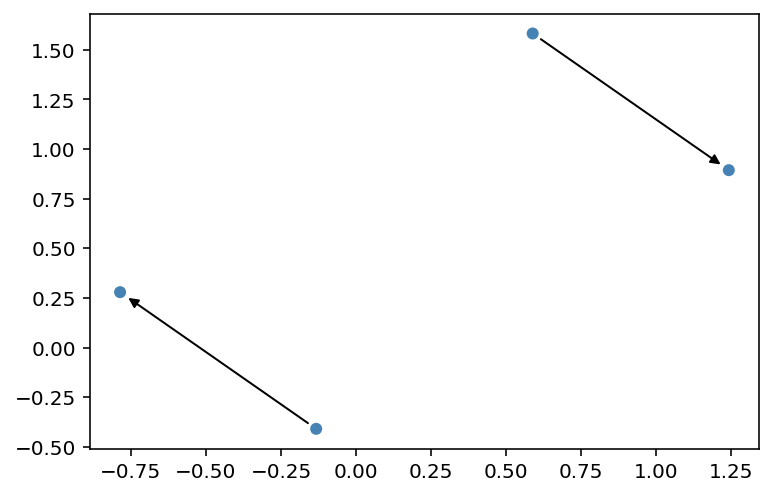

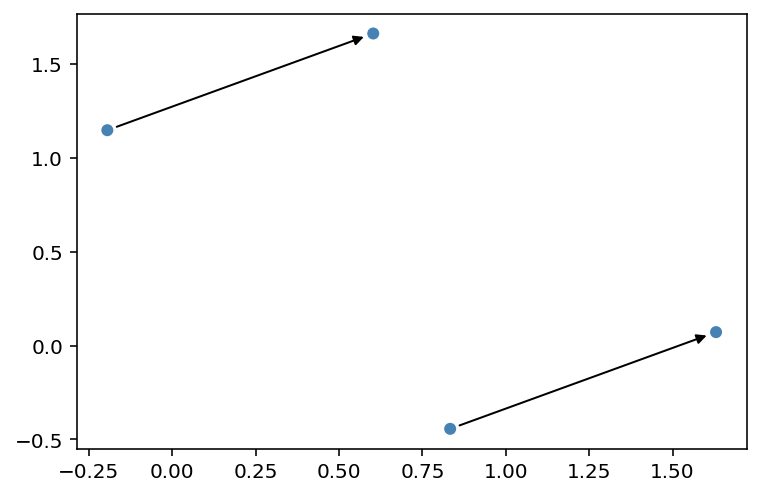

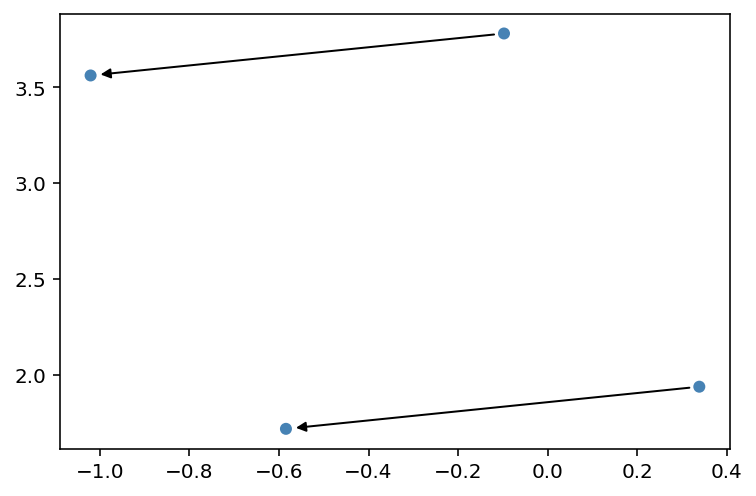

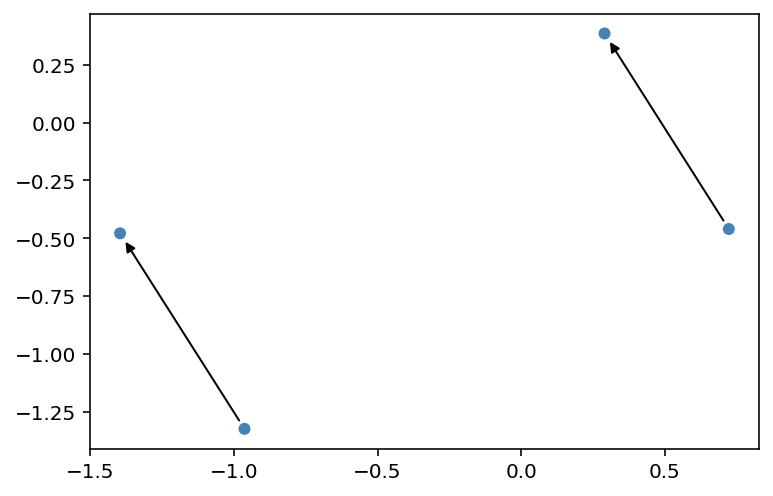

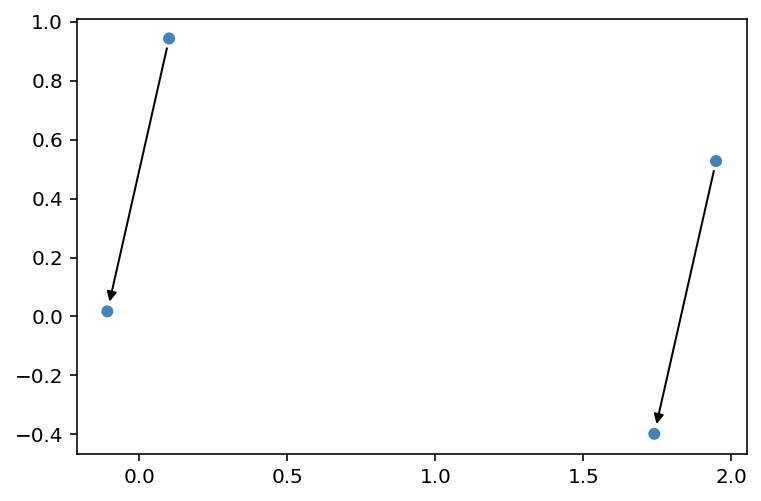

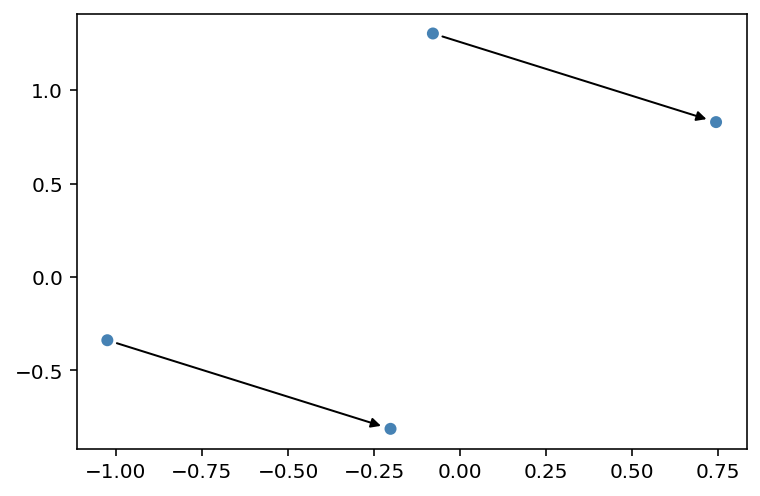

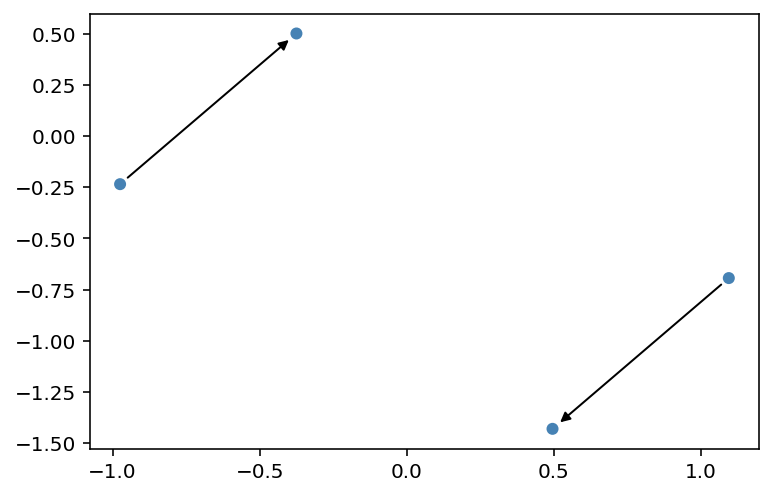

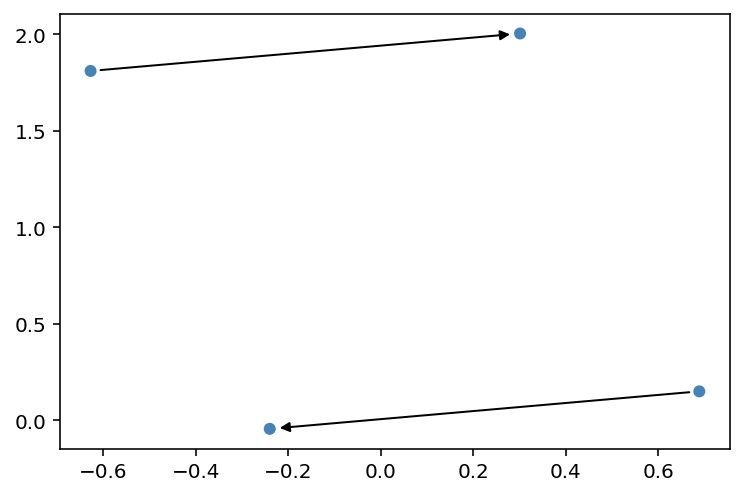

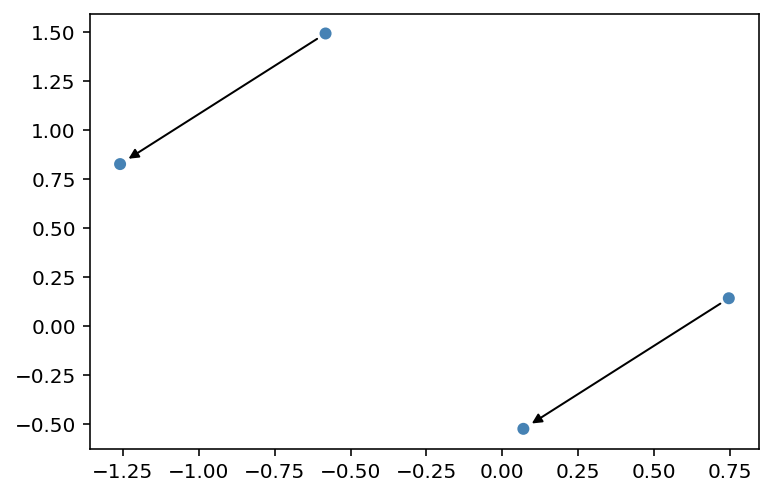

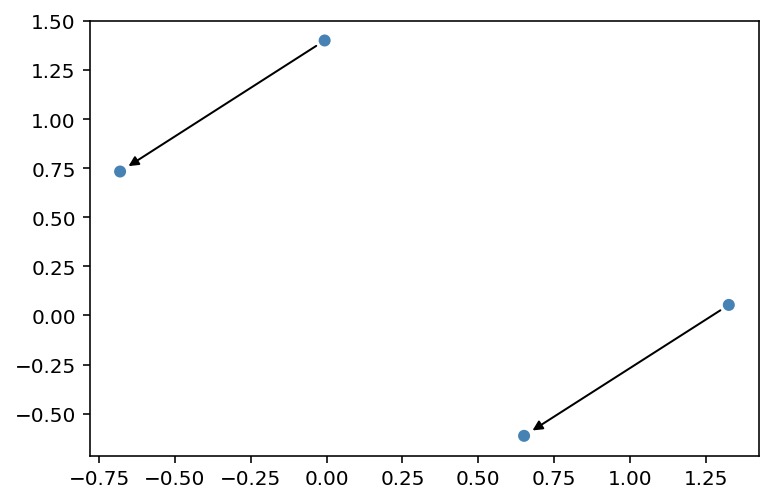

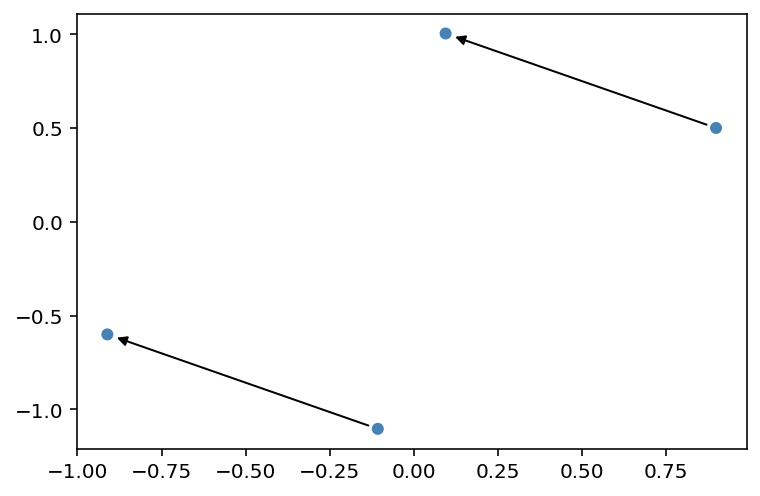

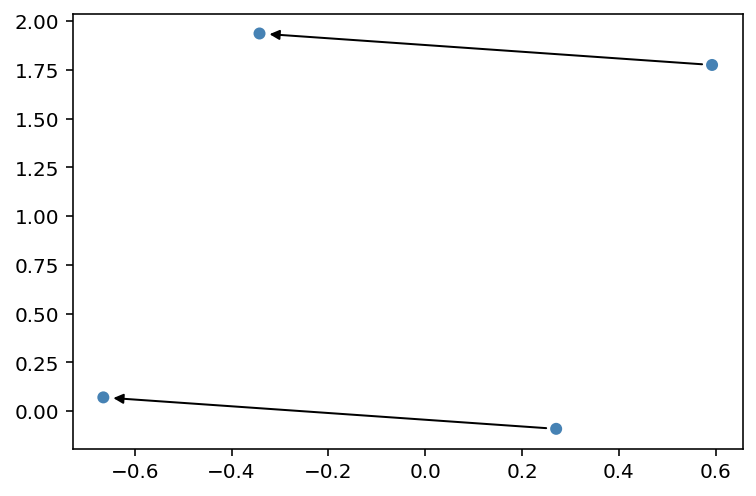

In [23]:
def graph(file):
    key_vector = pd.DataFrame()
    s = music21.converter.parse(file)
    df = pd.DataFrame(s)
    key = s.analyze('key')
    
    g = ig.Graph.TupleList(df.itertuples(index=False), directed=True, weights=False, edge_attrs="weight")
    fig, ax = plt.subplots()
    ig.plot(g, target=ax)
    return g

for file in file_list_BPS:
    graph(file)